In [1]:
import torch
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline, StableDiffusionInpaintPipelineLegacy, DDIMScheduler, AutoencoderKL
from PIL import Image

from ip_adapter import IPAdapterPlus

c:\Users\AFSALab\.conda\envs\stable_diffusion1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
base_model_path = "SG161222/Realistic_Vision_V4.0_noVAE"
vae_model_path = "stabilityai/sd-vae-ft-mse"
image_encoder_path = "models/image_encoder"
ip_ckpt = "models/ip-adapter-plus_sd15.bin"
device = "cuda"

In [3]:
base_model_path = r"D:\Models\stable-diffusion-v1-5"
vae_model_path = "stabilityai/sd-vae-ft-mse"
use_BioCLIP = True
# image_encoder_path = r"D:\BoyangDeng\StableDiffusionWeedV2\bioclip\model"
image_encoder_path = r'D:\BoyangDeng\StableDiffusionWeedV2\bioclip\model\open_clip_pytorch_model.bin'

# image_encoder_path = r"D:\Models\clip_vision\clip_image_encoder"
# ip_ckpt = r"D:\BoyangDeng\StableDiffusion\ComfyUI\models\ipadapter\ip_adapter_plus_sd15_10_species_bioclip_train120k.bin"
ip_ckpt = r"D:\BoyangDeng\StableDiffusion\IP-Adapter\output_models_sd_ip_adapter__MultipleSpecies_10species\checkpoint-115000\ip_adapter.bin"
# ip_ckpt = r"D:\BoyangDeng\StableDiffusion\ComfyUI\models\ipadapter\ip_adapter_plus_sd15_10_species.bin"
device = "cuda"

In [4]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

noise_scheduler = DDIMScheduler(
    num_train_timesteps=1000,
    beta_start=0.00085,
    beta_end=0.012,
    beta_schedule="scaled_linear",
    clip_sample=False,
    set_alpha_to_one=False,
    steps_offset=1,
)
vae = AutoencoderKL.from_pretrained(vae_model_path).to(dtype=torch.float16)

c:\Users\AFSALab\.conda\envs\stable_diffusion1\lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [5]:
# load SD pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    scheduler=noise_scheduler,
    vae=vae,
    feature_extractor=None,
    safety_checker=None,
    low_cpu_mem_usage=False
)

Loading pipeline components...: 100%|██████████| 5/5 [00:06<00:00,  1.24s/it]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


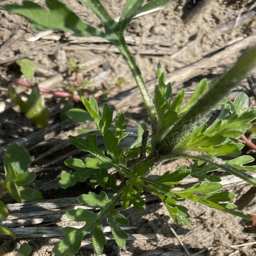

In [28]:
# read image prompt
# image = Image.open("assets/images/statue.png")
import os
im_dir = r"D:\Dataset\WeedData\weed_10_species\train2017_real_object_in_box\_MultipleSpecies_10species_shuffle_high_quality"
name = '311_Purslane_20210812_iPhoneSE_YL_893_197.jpg'
name = '16419_PalmerAmaranth_20220913_iPhoneSE_YL_1_344.jpg'
name = '234_Ragweed_20230804_HTRC_iPhone12_WY_80_888.jpg'

image = Image.open(os.path.join(im_dir, name))
image.resize((256, 256))

In [7]:
# load ip-adapter
ip_model = IPAdapterPlus(pipe, image_encoder_path, ip_ckpt, device, num_tokens=16, use_BioCLIP=use_BioCLIP)

100%|██████████| 20/20 [00:03<00:00,  6.43it/s]


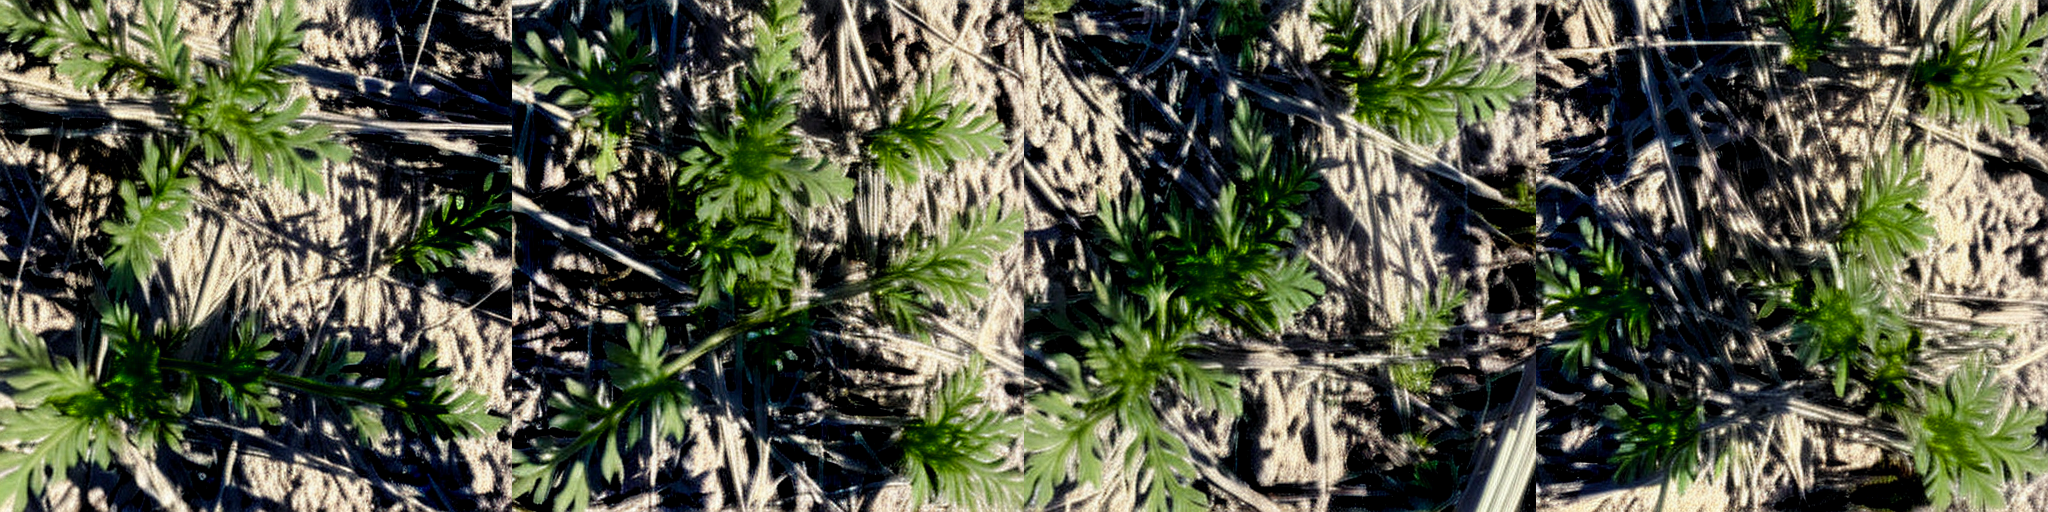

In [30]:
# only image prompt
# images = ip_model.generate(pil_image=image, num_samples=4, num_inference_steps=50, seed=42)
images = ip_model.generate(pil_image=image, num_samples=4, num_inference_steps=20, seed=42)
grid = image_grid(images, 1, 4)
grid

100%|██████████| 20/20 [00:02<00:00,  6.89it/s]


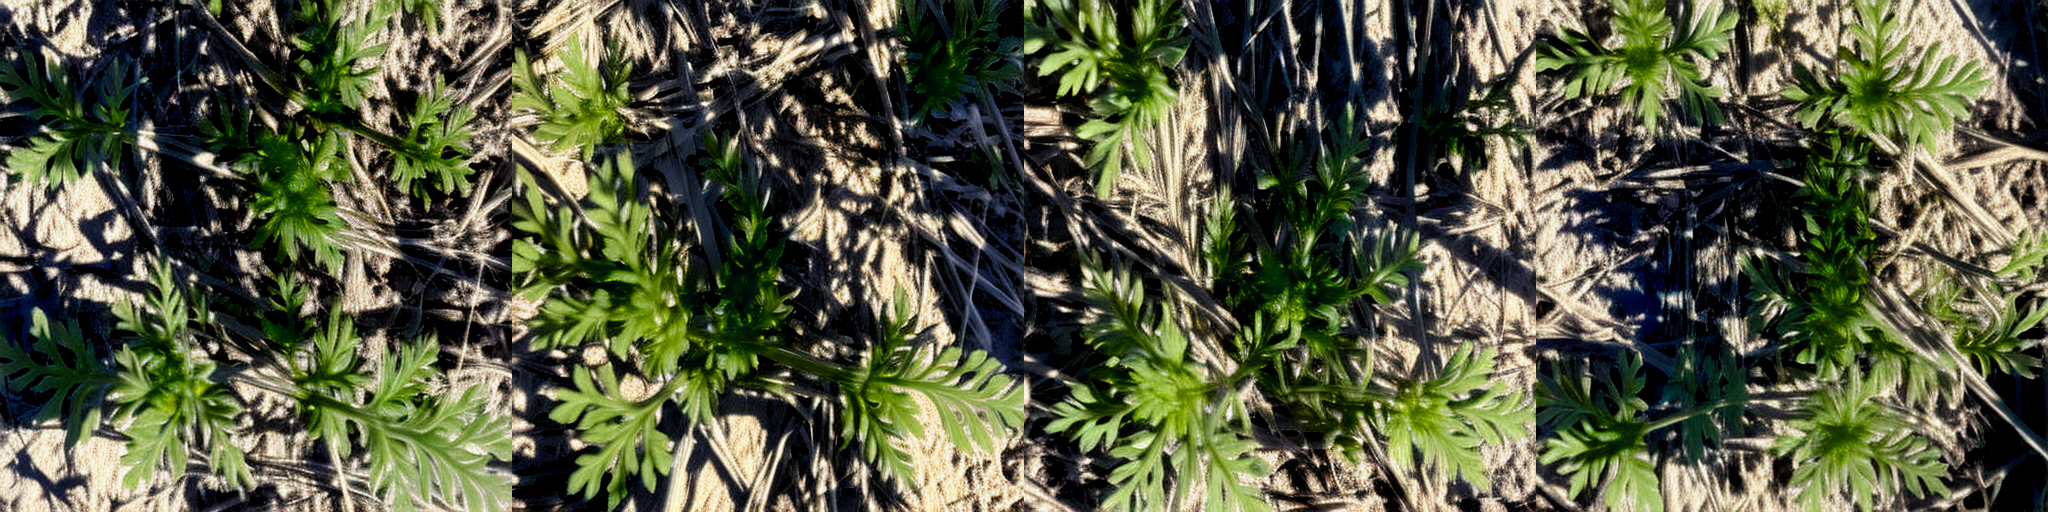

In [29]:
# multimodal prompts
# images = ip_model.generate(pil_image=image, num_samples=4, num_inference_steps=50, seed=42,
#         prompt="best quality, high quality, wearing a hat on the beach", scale=0.6)
images = ip_model.generate(pil_image=image, num_samples=4, num_inference_steps=20, seed=1,
        prompt="Please generate a top-down illustration of a field with a realistic depiction of plants under various lighting conditions", scale=0.8)
grid = image_grid(images, 1, 4)
grid

  0%|          | 0/50 [00:00<?, ?it/s]

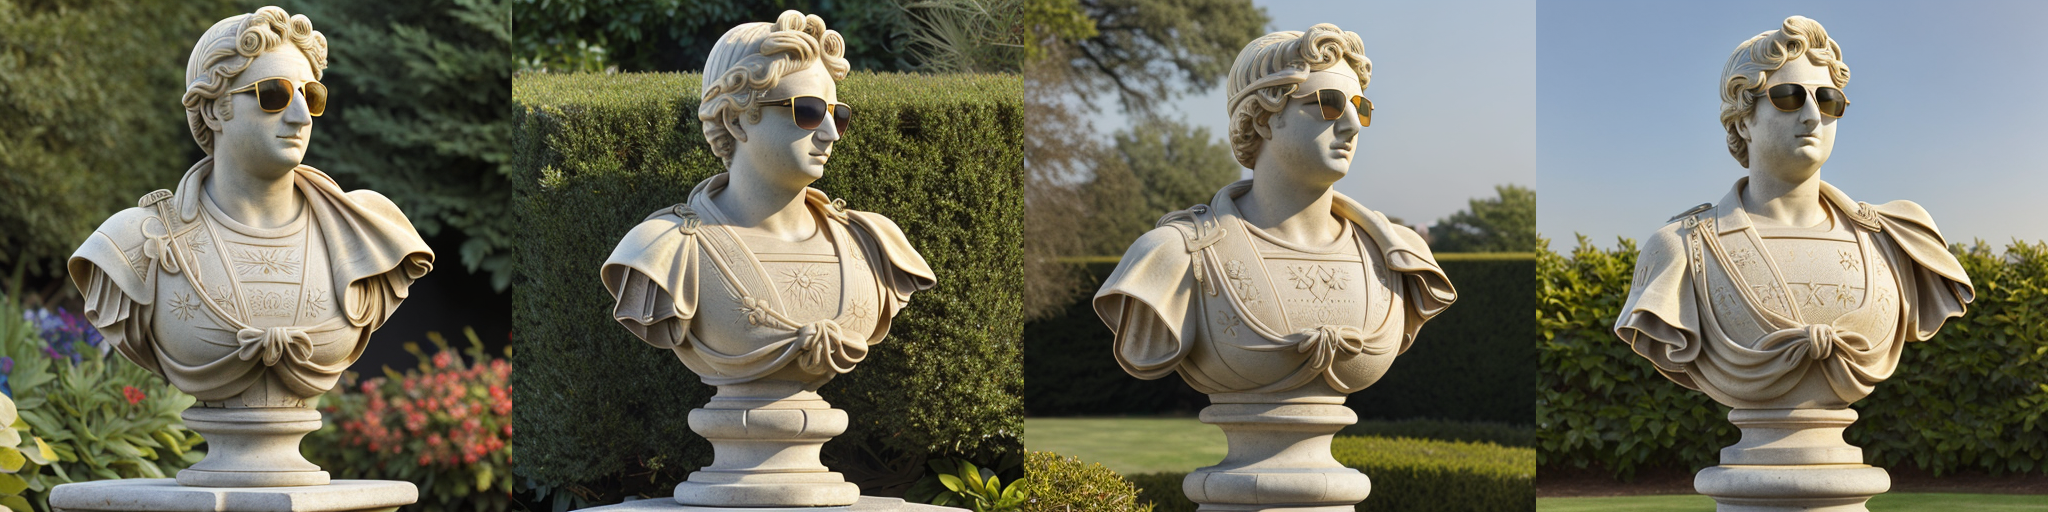

In [9]:
# multimodal prompts
images = ip_model.generate(pil_image=image, num_samples=4, num_inference_steps=50, seed=42,
        prompt="best quality, high quality, wearing sunglasses in a garden", scale=0.6)
grid = image_grid(images, 1, 4)
grid